Author: Andreas Traut   
Basis for this notebook are various tutorials which I found on the internet and documentation from Tensorflow.   
Date: 11.09.2020

In this notebook the data will be loaded as well as the model (no recalculation of the model).

# Import the libaries

In [1]:
import numpy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import constraints 
from tensorflow.keras import utils
from tensorflow.keras import models

In [2]:
import pathlib
import PIL
import PIL.Image
import tensorflow as tf

In [3]:
seed = 21

# Load and prepare the data

In [7]:
dataset_path = "C:\\Users\\andre\\Documents\\GitHub\\Deep_learning_explorations\\data\\caltechown"

In [8]:
data_dir = pathlib.Path(dataset_path)
data_dir

WindowsPath('C:/Users/andre/Documents/GitHub/Deep_learning_explorations/data/caltechown')

In [9]:
batch_size = 32

In [10]:
pic = list(data_dir.glob('001/*'))
img_width, img_height =tf.keras.preprocessing.image.load_img(pic[0]).size

In [19]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  labels="inferred", 
  label_mode="categorical",  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9267 files belonging to 107 classes.
Using 1853 files for validation.


# Load model

In [4]:
new_model = models.load_model('saved_model\my_model_caltechown')

In [5]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 195, 396, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 195, 396, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 195, 396, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 195, 396, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 195, 396, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 195, 396, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 97, 198, 64)       0

# Evaluate full model

In [20]:
scores = new_model.evaluate(val_ds, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 47.49%


# Compare with deleted-layer-model (first run)

In [44]:
new_model_firstrun = models.load_model('saved_model\my_model_caltechown_firstrun')

In [45]:
new_model_firstrun.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 195, 396, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 195, 396, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 195, 396, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 195, 396, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 195, 396, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 195, 396, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 97, 198, 64)       0

In [20]:
scores = new_model_firstrun.evaluate(val_ds, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 28.87%


# Make prediction

In [180]:
pic_path = dataset_path + "\\001\\58.jpg"
pic_path

'C:\\Users\\andre\\Documents\\GitHub\\Deep_learning_explorations\\data\\caltechown\\001\\58.jpg'

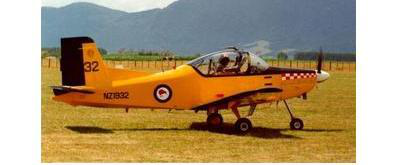

In [181]:
PIL.Image.open(str(pic_path))

In [182]:
img = tf.keras.preprocessing.image.load_img(pic_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [183]:
predictions_firstrun = new_model_firstrun.predict(img_array)
predictions_fullmodel = new_model.predict(img_array)

In [184]:
score_firstrun = tf.nn.softmax(predictions_firstrun[0])
score_firstrun

<tf.Tensor: shape=(107,), dtype=float32, numpy=
array([0.00927968, 0.01141601, 0.00928414, 0.00932462, 0.00943022,
       0.00927647, 0.0092848 , 0.00930998, 0.00927981, 0.00938496,
       0.00929279, 0.00933107, 0.00928743, 0.0093743 , 0.00926358,
       0.00932343, 0.00925645, 0.00931898, 0.00927536, 0.00934099,
       0.00929466, 0.00926054, 0.00926792, 0.00928253, 0.00944543,
       0.0092734 , 0.00927436, 0.00927115, 0.00926506, 0.00926321,
       0.00926272, 0.00941323, 0.00928461, 0.00925809, 0.00927867,
       0.00928721, 0.00926747, 0.00925868, 0.00926047, 0.00926787,
       0.00926719, 0.00928988, 0.00979409, 0.009284  , 0.00926805,
       0.00926507, 0.00927207, 0.00926033, 0.00926966, 0.00932345,
       0.00932217, 0.00925851, 0.00930957, 0.00927869, 0.00928675,
       0.00926947, 0.00926269, 0.00926591, 0.00928437, 0.00939445,
       0.00932307, 0.00933017, 0.00933618, 0.00978861, 0.00929309,
       0.00925709, 0.00950051, 0.00926455, 0.00927245, 0.00930042,
       0.00925

In [185]:
score_fullmodel = tf.nn.softmax(predictions_fullmodel[0])
score_fullmodel

<tf.Tensor: shape=(107,), dtype=float32, numpy=
array([0.00925413, 0.01407892, 0.0092601 , 0.00928629, 0.00928472,
       0.00928789, 0.00927363, 0.0093017 , 0.00925129, 0.00930598,
       0.00925626, 0.00927701, 0.0092851 , 0.00939946, 0.00925393,
       0.00926637, 0.00925394, 0.00925636, 0.00925353, 0.0092526 ,
       0.00925143, 0.00941453, 0.00960959, 0.0094709 , 0.00929136,
       0.00943939, 0.00967139, 0.00925149, 0.00925419, 0.00930978,
       0.00926557, 0.00925327, 0.00925219, 0.00927062, 0.00937782,
       0.00926034, 0.00925816, 0.00925235, 0.00925821, 0.00925762,
       0.0092659 , 0.00929685, 0.00925971, 0.00935825, 0.00926487,
       0.00925129, 0.00949905, 0.00925147, 0.00948087, 0.00927114,
       0.00930458, 0.00925081, 0.00926157, 0.0093163 , 0.00925222,
       0.00925302, 0.00925354, 0.00933166, 0.00935775, 0.00926714,
       0.009261  , 0.00931211, 0.00928607, 0.00926874, 0.00925756,
       0.00925183, 0.0093067 , 0.0092528 , 0.00925174, 0.00933886,
       0.00925

In [186]:
print(
    "First run: This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(numpy.argmax(score_firstrun), 100 * numpy.max(score_firstrun))
)
print(
    "Full model: This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(numpy.argmax(score_fullmodel), 100 * numpy.max(score_fullmodel))
)

First run: This image most likely belongs to 1 with a 1.14 percent confidence.
Full model: This image most likely belongs to 1 with a 1.41 percent confidence.


In [153]:
pic_path = dataset_path + "\\102\\9145.jpg"
pic_path

'C:\\Users\\andre\\Documents\\GitHub\\Deep_learning_explorations\\data\\caltechown\\102\\9145.jpg'

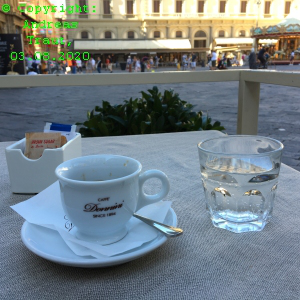

In [154]:
PIL.Image.open(str(pic_path))

In [155]:
img = tf.keras.preprocessing.image.load_img(pic_path, target_size=(img_height, img_width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [156]:
predictions_firstrun = new_model_firstrun.predict(img_array)
predictions_fullmodel = new_model.predict(img_array)

In [157]:
score_firstrun = tf.nn.softmax(predictions_firstrun[0])
score_firstrun

<tf.Tensor: shape=(107,), dtype=float32, numpy=
array([0.00928201, 0.00933076, 0.00940553, 0.00928481, 0.01058365,
       0.00932997, 0.00929098, 0.00931366, 0.00932353, 0.0092984 ,
       0.00928694, 0.00933897, 0.00927607, 0.00928015, 0.00941858,
       0.00926958, 0.00928285, 0.00931558, 0.00931885, 0.0093633 ,
       0.00926294, 0.00928161, 0.00930243, 0.00929765, 0.00928034,
       0.00927288, 0.00926998, 0.00944298, 0.00931956, 0.00927874,
       0.00932931, 0.00955542, 0.00928897, 0.00926954, 0.00926899,
       0.00934932, 0.009349  , 0.00927574, 0.00938725, 0.00933831,
       0.00930552, 0.00928592, 0.00936953, 0.0092735 , 0.00931718,
       0.00933587, 0.00927163, 0.00934747, 0.00928137, 0.00935367,
       0.00928958, 0.00927824, 0.0092785 , 0.00927628, 0.00935598,
       0.00928758, 0.0093247 , 0.00926802, 0.00926982, 0.00930494,
       0.00927885, 0.00933691, 0.00932173, 0.00958932, 0.00926858,
       0.00926401, 0.00929673, 0.00928674, 0.00926953, 0.00930257,
       0.00927

In [158]:
score_fullmodel = tf.nn.softmax(predictions_fullmodel[0])
score_fullmodel

<tf.Tensor: shape=(107,), dtype=float32, numpy=
array([0.00923605, 0.00930067, 0.009253  , 0.00923471, 0.00950971,
       0.00956015, 0.00924359, 0.00927011, 0.0092486 , 0.00933823,
       0.00923576, 0.00927619, 0.00925696, 0.00923506, 0.00924054,
       0.00925021, 0.00932718, 0.00924087, 0.00923571, 0.00929596,
       0.009235  , 0.00925797, 0.00925089, 0.00925291, 0.00924196,
       0.00924605, 0.00924968, 0.00925071, 0.00923546, 0.00925232,
       0.00937584, 0.00923838, 0.00923608, 0.00936951, 0.00925186,
       0.00924422, 0.00925495, 0.00924255, 0.00924329, 0.00926693,
       0.00939122, 0.00924782, 0.00924841, 0.00925168, 0.00929486,
       0.00925622, 0.00925108, 0.00923587, 0.00926021, 0.00926592,
       0.00926538, 0.00923735, 0.00923724, 0.00931976, 0.00925394,
       0.00926566, 0.00925522, 0.00923431, 0.0092988 , 0.00923966,
       0.00923712, 0.00924769, 0.00924102, 0.00923998, 0.0092378 ,
       0.00924063, 0.00923482, 0.00923655, 0.00923682, 0.00925889,
       0.00923

In [159]:
print(
    "First run: This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(numpy.argmax(score_firstrun), 100 * numpy.max(score_firstrun))
)
print(
    "Full model: This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(numpy.argmax(score_fullmodel), 100 * numpy.max(score_fullmodel))
)

First run: This image most likely belongs to 102 with a 1.12 percent confidence.
Full model: This image most likely belongs to 102 with a 1.82 percent confidence.


In [174]:
def my_prediction(pic_path):
    img = tf.keras.preprocessing.image.load_img(pic_path, target_size=(img_height, img_width))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions_firstrun = new_model_firstrun.predict(img_array)
    predictions_fullmodel = new_model.predict(img_array)
    score_firstrun = tf.nn.softmax(predictions_firstrun[0])
    score_fullmodel = tf.nn.softmax(predictions_fullmodel[0])
    print(
        "First run: This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(numpy.argmax(score_firstrun), 100 * numpy.max(score_firstrun))
    )
    print(
        "Full model: This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(numpy.argmax(score_fullmodel), 100 * numpy.max(score_fullmodel))
    )
    

First run: This image most likely belongs to 102 with a 1.63 percent confidence.
Full model: This image most likely belongs to 102 with a 2.33 percent confidence.


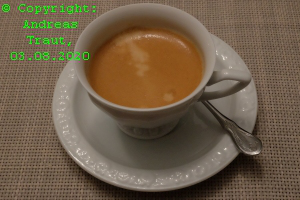

In [177]:
pic_path = dataset_path + "\\102\\9159.jpg"
my_prediction(pic_path)
PIL.Image.open(str(pic_path))

First run: This image most likely belongs to 102 with a 1.48 percent confidence.
Full model: This image most likely belongs to 102 with a 2.43 percent confidence.


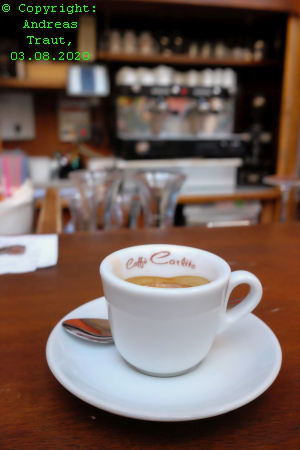

In [178]:
pic_path = dataset_path + "\\102\\9177.jpg"
my_prediction(pic_path)
PIL.Image.open(str(pic_path))

First run: This image most likely belongs to 1 with a 1.42 percent confidence.
Full model: This image most likely belongs to 1 with a 1.85 percent confidence.


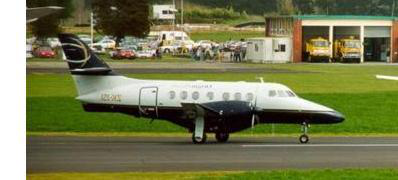

In [179]:
pic_path = dataset_path + "\\001\\73.jpg"
my_prediction(pic_path)
PIL.Image.open(str(pic_path))

First run: This image most likely belongs to 1 with a 1.61 percent confidence.
Full model: This image most likely belongs to 73 with a 1.05 percent confidence.


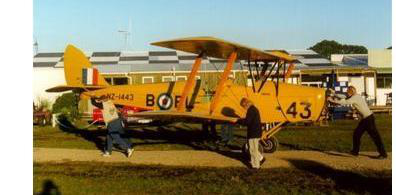

In [190]:
pic_path = dataset_path + "\\001\\100.jpg"
my_prediction(pic_path)
PIL.Image.open(str(pic_path))

First run: This image most likely belongs to 99 with a 1.12 percent confidence.
Full model: This image most likely belongs to 23 with a 1.03 percent confidence.


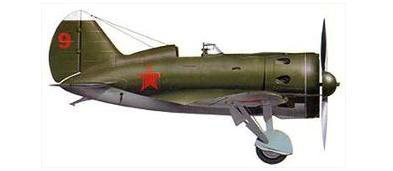

In [191]:
pic_path = dataset_path + "\\001\\155.jpg"
my_prediction(pic_path)
PIL.Image.open(str(pic_path))

First run: This image most likely belongs to 4 with a 1.07 percent confidence.
Full model: This image most likely belongs to 102 with a 2.11 percent confidence.


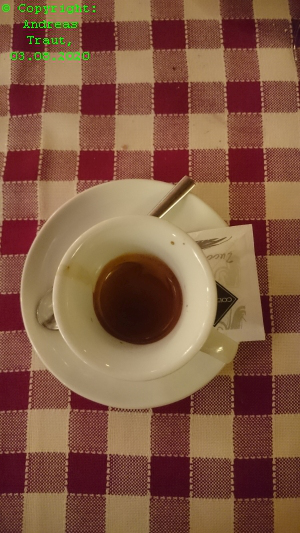

In [192]:
pic_path = dataset_path + "\\102\\9154.jpg"
my_prediction(pic_path)
PIL.Image.open(str(pic_path))

First run: This image most likely belongs to 102 with a 1.08 percent confidence.
Full model: This image most likely belongs to 102 with a 2.32 percent confidence.


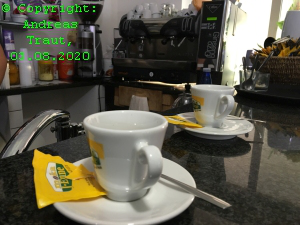

In [193]:
pic_path = dataset_path + "\\102\\9155.jpg"
my_prediction(pic_path)
PIL.Image.open(str(pic_path))

First run: This image most likely belongs to 102 with a 2.15 percent confidence.
Full model: This image most likely belongs to 102 with a 2.28 percent confidence.


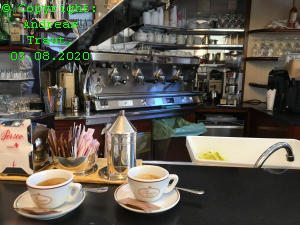

In [196]:
pic_path = dataset_path + "\\102\\9178.jpg"
my_prediction(pic_path)
PIL.Image.open(str(pic_path))

# Download image from internet

# Predict

In [ ]:
probability_model = tf.keras.Sequential([new_model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(val_ds)

In [ ]:
predictions[0]

In [ ]:
numpy.argmax(predictions[0])